In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [3]:
df=pd.read_csv('/content/drive/MyDrive/yahoo_stock.csv')

In [4]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [6]:
df.isnull().values.sum()

0

In [7]:
type(df['Date'][0])

str

In [9]:
df1=df.drop('Volume',axis=1)
df1.head()

,Date,High,Low,Open,Close,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,2090.110107


In [10]:
df2=df1['Close']
df2.head()

0    2086.590088
1    2089.139893
2    2088.870117
3    2088.870117
4    2090.110107
Name: Close, dtype: float64

In [11]:
df2

0       2086.590088
1       2089.139893
2       2088.870117
3       2088.870117
4       2090.110107
           ...     
1820    3626.909912
1821    3609.530029
1822    3567.790039
1823    3581.870117
1824    3557.540039
Name: Close, Length: 1825, dtype: float64

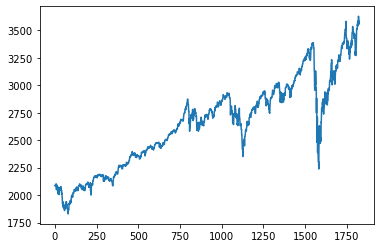

In [13]:
#Plotting the data of df2
import matplotlib.pyplot as plt
plt.plot(df2)

In [16]:
df2.shape

(1825,)

In [18]:
# df3=np.array(df2).reshape(-1,1)
# df3.shape

(1825, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
df2

array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.96711598],
       [0.97494769],
       [0.96141466]])

In [21]:
# min(df2)

array([0.])

In [22]:
len(df2)

1825

In [28]:
#Dividing the input into traina and test split
training_size=int(len(df2)*0.70)
training_data=df2[:training_size]
test_size=len(df2)-training_size
test_data=df2[training_size:len(df2)]

In [29]:
training_data

array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.56242807],
       [0.57584987],
       [0.57134995]])

In [30]:
test_data

array([[0.55242156],
       [0.55454638],
       [0.55454638],
       [0.55454638],
       [0.55454638],
       [0.54138042],
       [0.53060639],
       [0.5338548 ],
       [0.51338565],
       [0.51338565],
       [0.51338565],
       [0.50915271],
       [0.54186997],
       [0.55459636],
       [0.56424137],
       [0.58084477],
       [0.58084477],
       [0.58084477],
       [0.58829258],
       [0.58773079],
       [0.58446024],
       [0.5910236 ],
       [0.58843164],
       [0.58843164],
       [0.58843164],
       [0.58992785],
       [0.60554673],
       [0.61039143],
       [0.62581001],
       [0.62374086],
       [0.62374086],
       [0.62374086],
       [0.62089862],
       [0.60534086],
       [0.60333852],
       [0.60953482],
       [0.61890172],
       [0.61890172],
       [0.61890172],
       [0.63145578],
       [0.63628379],
       [0.64897134],
       [0.64897134],
       [0.64596207],
       [0.64596207],
       [0.64596207],
       [0.63791906],
       [0.639

In [31]:
len(training_data), len(test_data)

(1277, 548)

In [54]:
def timestamps(dataset, time_step):
  dataX=[]
  dataY=[]
  for i in range(len(dataset)-time_step):
    a=dataset[i:(i+time_step)] #Keeping the shape in accordance with the LSTM
    b=dataset[i+time_step,0]
    dataX.append(a)
    dataY.append(b)
  return np.array(dataX), np.array(dataY)

In [55]:
step_size=100
train_X, train_y=timestamps(training_data,step_size)


In [56]:
train_X.shape, train_y.shape

((1177, 100, 1), (1177,))

In [57]:
test_X,test_y=timestamps(test_data, step_size)
test_X.shape, test_y.shape

((448, 100, 1), (448,))

In [59]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
__________________________________________________

In [60]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
__________________________________________________

In [63]:
model.fit(train_X, train_y,validation_data=(test_X,test_y),epochs=100, batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 10s 257ms/step - loss: 0.0249 - val_loss: 0.0186
Epoch 2/100
19/19 [==============================] - 4s 200ms/step - loss: 0.0029 - val_loss: 0.0097
Epoch 3/100
19/19 [==============================] - 4s 197ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 4/100
19/19 [==============================] - 4s 198ms/step - loss: 9.1117e-04 - val_loss: 0.0055
Epoch 5/100
19/19 [==============================] - 4s 201ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 6/100
19/19 [==============================] - 4s 198ms/step - loss: 9.2451e-04 - val_loss: 0.0071
Epoch 7/100
19/19 [==============================] - 4s 201ms/step - loss: 8.9722e-04 - val_loss: 0.0056
Epoch 8/100
19/19 [==============================] - 4s 203ms/step - loss: 8.6490e-04 - val_loss: 0.0063
Epoch 9/100
19/19 [==============================] - 4s 201ms/step - loss: 8.5983e-04 - val_loss: 0.0067
Epoch 10/100
19/19 [==============================] - 4s 199ms/step - 

In [65]:
predict=model.predict(test_X)
predict

array([[0.57405764],
       [0.58212763],
       [0.5897567 ],
       [0.59573275],
       [0.5983312 ],
       [0.5997148 ],
       [0.6028008 ],
       [0.60750574],
       [0.612724  ],
       [0.61734366],
       [0.6206397 ],
       [0.62244457],
       [0.62423366],
       [0.6266094 ],
       [0.62907404],
       [0.6311561 ],
       [0.6325788 ],
       [0.6326975 ],
       [0.63223696],
       [0.63164866],
       [0.63116455],
       [0.62996644],
       [0.628275  ],
       [0.6265229 ],
       [0.6250642 ],
       [0.6225654 ],
       [0.6205423 ],
       [0.61901397],
       [0.6171271 ],
       [0.61509013],
       [0.6132839 ],
       [0.61289805],
       [0.61164683],
       [0.6063626 ],
       [0.59964204],
       [0.5957252 ],
       [0.5952218 ],
       [0.5973773 ],
       [0.6002071 ],
       [0.6000193 ],
       [0.5985063 ],
       [0.5977121 ],
       [0.59991145],
       [0.6044764 ],
       [0.6100158 ],
       [0.6149641 ],
       [0.6203111 ],
       [0.625

In [67]:
for i in range(10):
  print(predict[i]," ",test_y[i])

[0.57405764]   0.6103914339546312
[0.58212763]   0.6103914339546312
[0.5897567]   0.6103914339546312
[0.59573275]   0.5991612609684405
[0.5983312]   0.6166879517767154
[0.5997148]   0.6379468981939829
[0.6028008]   0.6394542492804265
[0.60750574]   0.6394542492804265
[0.612724]   0.6394542492804265
[0.61734366]   0.6392984896681606


In [71]:
# predict_y=scaler.inverse_transform(predict)
# testing_y=scaler.inverse_transform(test_y.reshape(-1,1))

In [75]:
# print(mean_squared_error(testing_y,predict_y))
# print(math.sqrt(mean_squared_error(testing_y,predict_y)))

In [69]:
import math
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_y, predict))
print(math.sqrt(mean_squared_error(test_y, predict)))

0.0028699183738917964
0.05357161910836555


In [79]:
print(len(test_data))

548


In [94]:
input_data=test_data[448:].reshape(1,-1)
input_data.shape

(1, 100)

In [95]:
temp=list(input_data)
temp=temp[0].tolist()

In [96]:
temp

[0.8590078112698665,
 0.8586852924563257,
 0.8586852924563257,
 0.8586852924563257,
 0.863769139539496,
 0.8681021628247434,
 0.8597977447176002,
 0.8657270663831307,
 0.8722070464860965,
 0.8722070464860965,
 0.8722070464860965,
 0.8911855472461883,
 0.8980494265853141,
 0.9175784499854458,
 0.9208157240890251,
 0.9338647673861913,
 0.9338647673861913,
 0.9338647673861913,
 0.9295818533397637,
 0.9442327627104155,
 0.9743747599356674,
 0.9044126209284291,
 0.8887826123385649,
 0.8887826123385649,
 0.8887826123385649,
 0.8887826123385649,
 0.8358744534069971,
 0.8732082806807224,
 0.8399626339887436,
 0.8409527327969653,
 0.8409527327969653,
 0.8409527327969653,
 0.8646313172014628,
 0.8744542217814539,
 0.8657159309967264,
 0.8498746216599697,
 0.8289938709882649,
 0.8289938709882649,
 0.8289938709882649,
 0.807629274197551,
 0.8268246433977378,
 0.7830773767446824,
 0.7884561757701731,
 0.8173075545516808,
 0.8173075545516808,
 0.8173075545516808,
 0.8468654871802845,
 0.837893489078

In [97]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp)>100):
       
        x_input=np.array(temp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp.extend(yhat[0].tolist())
        temp=temp[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = input_data.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.8902662]
101
1 day input [0.85868529 0.85868529 0.85868529 0.86376914 0.86810216 0.85979774
 0.86572707 0.87220705 0.87220705 0.87220705 0.89118555 0.89804943
 0.91757845 0.92081572 0.93386477 0.93386477 0.93386477 0.92958185
 0.94423276 0.97437476 0.90441262 0.88878261 0.88878261 0.88878261
 0.88878261 0.83587445 0.87320828 0.83996263 0.84095273 0.84095273
 0.84095273 0.86463132 0.87445422 0.86571593 0.84987462 0.82899387
 0.82899387 0.82899387 0.80762927 0.82682464 0.78307738 0.78845618
 0.81730755 0.81730755 0.81730755 0.84686549 0.83789349 0.85320641
 0.86310726 0.84509659 0.84509659 0.84509659 0.87857038 0.85207726
 0.88459978 0.89983489 0.916694   0.916694   0.916694   0.94844343
 0.93604513 0.92310731 0.92014271 0.92040412 0.92040412 0.92040412
 0.88876034 0.89777131 0.89356621 0.90353931 0.91015834 0.91015834
 0.91015834 0.8743263  0.86860271 0.80205031 0.82378767 0.80145511
 0.80145511 0.80145511 0.82385991 0.85663271 0.89794921 0.93522193
 0.93466013 0.93466013 0.93466013 